# Data reading and preprocessing

## Reading data

In [2]:
#loading libararies
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/Users/momen/Desktop/easy/Synthetic-Data-Generator/data/AllProductReviews.csv")

In [4]:
df.head()

,ReviewTitle,ReviewBody,ReviewStar,Product
0,Honest review of an edm music lover\n,No doubt it has a great bass and to a great ex...,3,boAt Rockerz 255
1,Unreliable earphones with high cost\n,"This earphones are unreliable, i bought it be...",1,boAt Rockerz 255
2,Really good and durable.\n,"i bought itfor 999,I purchased it second time,...",4,boAt Rockerz 255
3,stopped working in just 14 days\n,Its sound quality is adorable. overall it was ...,1,boAt Rockerz 255
4,Just Awesome Wireless Headphone under 1000...😉\n,Its Awesome... Good sound quality & 8-9 hrs ba...,5,boAt Rockerz 255


# Exploratory Data Analysis

## Data overview

In [ ]:
df.head()

,ReviewTitle,ReviewBody,ReviewStar,Product
0,Honest review of an edm music lover\n,No doubt it has a great bass and to a great ex...,3,boAt Rockerz 255
1,Unreliable earphones with high cost\n,"This earphones are unreliable, i bought it be...",1,boAt Rockerz 255
2,Really good and durable.\n,"i bought itfor 999,I purchased it second time,...",4,boAt Rockerz 255
3,stopped working in just 14 days\n,Its sound quality is adorable. overall it was ...,1,boAt Rockerz 255
4,Just Awesome Wireless Headphone under 1000...😉\n,Its Awesome... Good sound quality & 8-9 hrs ba...,5,boAt Rockerz 255


In [ ]:
df.describe()

,ReviewStar
count,14337.000000
mean,3.675874
std,1.503409
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000



*   obviously there are outilers in data since max is far from
3rd quantile in quantity and discount .
*   discount here is percentage we must impute any row with discount > 100 or <0 .



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14337 entries, 0 to 14336
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ReviewTitle  14337 non-null  object
 1   ReviewBody   14337 non-null  object
 2   ReviewStar   14337 non-null  int64 
 3   Product      14337 non-null  object
dtypes: int64(1), object(3)
memory usage: 448.2+ KB


## Data cleaning

In [ ]:
df.isnull().sum()  # Shows the count of missing values per column

ReviewTitle    0
ReviewBody     0
ReviewStar     0
Product        0
dtype: int64

<Axes: >

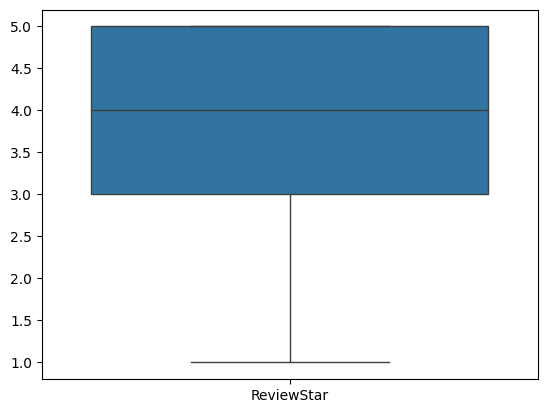

In [ ]:
sns.boxplot(data=df)

##Univariate Analysis

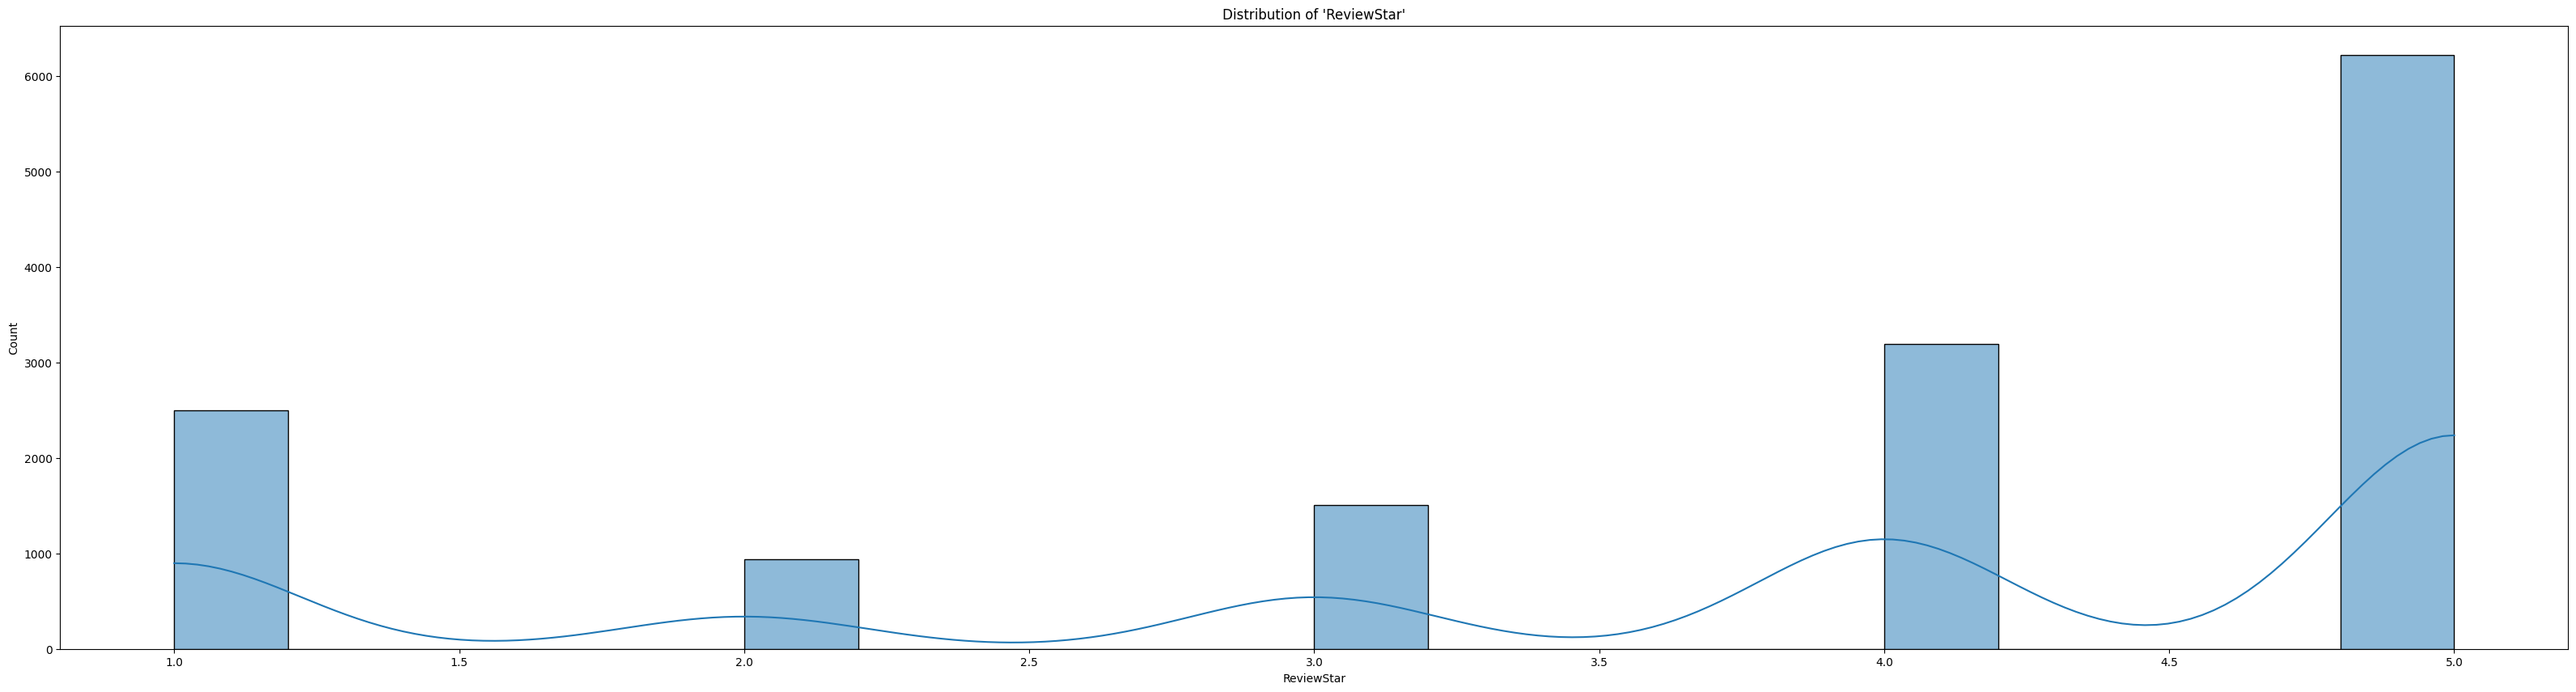

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(40, 10))

sns.histplot(
    ax=axes,
    x=df["ReviewStar"],
    bins=20,
    kde=True,
    cbar=True
).set(title="Distribution of 'ReviewStar'")

plt.show()


In [ ]:
rating_ratio = df["ReviewStar"].value_counts(normalize=True).sort_index()
print(rating_ratio)


ReviewStar
1    0.173886
2    0.065495
3    0.104834
4    0.222431
5    0.433354
Name: proportion, dtype: float64


In [9]:
ls

AllProductReviews.csv      data_investegations.ipynb
balanced_reviews_500.csv


In [10]:
# Create a balanced dataset with 500 reviews (100 from each rating)
balanced_df = df.groupby('ReviewStar').apply(lambda x: x.sample(n=100, random_state=42)).reset_index(drop=True)

# Shuffle the final dataset to mix the ratings
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Save the balanced and shuffled dataset
balanced_df.to_csv('balanced_reviews_500.csv', index=False)

# Verify the distribution and show the head to confirm shuffling
print("Distribution per rating:")
print(balanced_df['ReviewStar'].value_counts())
print("\nFirst 5 rows (shuffled):")
display(balanced_df.head())

Distribution per rating:
ReviewStar
4    100
1    100
2    100
5    100
3    100
Name: count, dtype: int64

First 5 rows (shuffled):


/var/folders/nd/xkfq0d952vb6sfbb8dyk5k5c0000gn/T/ipykernel_81515/2887112292.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = df.groupby('ReviewStar').apply(lambda x: x.sample(n=100, random_state=42)).reset_index(drop=True)


,ReviewTitle,ReviewBody,ReviewStar,Product
0,Great product in its price segment\n,Great product in its price segment. Good sound...,4,Sennheiser CX 6.0BT
1,Bad produt sold\n,I bought this product and returned it in 3 day...,1,boAt Rockerz 255
2,"After getting this product, I got to know some...","After getting this product, I got to know some...",4,Sennheiser CX 6.0BT
3,"Good product ,fast delivery\n","Average product , fast delivery I got this ite...",2,JBL T110BT
4,One side earphone is not working\n,"Don't purchase it because,after one month Righ...",2,boAt Rockerz 255
